<a href="https://colab.research.google.com/github/zubaidak/Summer-Microcredential-Data-Analytics-/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

A machine learning project using data from the UCI Machine Learning Repository.

The goal of this analysis is to predict whether a patient is likely to be readmitted to the hospital within 30 days based on age, race, and gender.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/zubaidak/ML-data/main/diabetic_data.csv')

# Data Exploration (EDA)

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [8]:
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

# Data Preparation (Wrangling/Cleaning, etc.)

In [9]:
# replace method to replace the missing data with '?'
df = df.replace('?',np.nan)

In [10]:
df.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().value_counts()

encounter_id  patient_nbr  race   gender  age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
False         False        False  False   False  True    False              False                     False                False             False       True               False               False           False            False              False             False             F

In [12]:
df.isnull().sum()
# this shows there are missing values in the data

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [13]:
cat = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','payer_code']
# columns with categorical data

In [14]:
df[cat].isnull().sum()
# to see the missing data in the categorical data which arent values

race                         2273
gender                          0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
payer_code                  40256
dtype: int64

In [15]:
df['race'] = df['race'].fillna('unknown')

# found at https://towardsdatascience.com/predicting-hospital-readmission-for-patients-with-diabetes-using-scikit-learn-a2e359b15f0
# race, medical_specialty, and payer_code have missing values so we will replace them with unknown

# Data Visualization

## Readmitted

In [19]:
print(df.readmitted.unique())

# This shows that there are 3 unique values for readmitted

['NO' '>30' '<30']


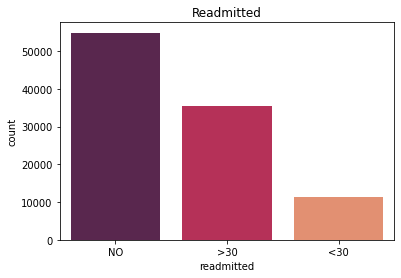

In [21]:
sns.countplot(x = "readmitted", data = df, palette = 'rocket')
plt.title("Readmitted")
plt.show()

In [52]:
df = df.replace({"NO":0,"<30":1,">30":0})
# replace the categorical values of readmitted for numerical values

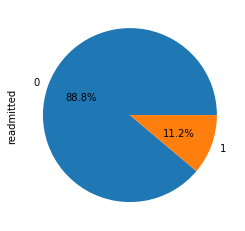

In [53]:
df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.show()
# No and >30 will be combined together to help show who wil be readmitted vs not

## Gender

In [34]:
print("Gender")
print(df.gender.value_counts(normalize = True)*100)

Gender
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: gender, dtype: float64


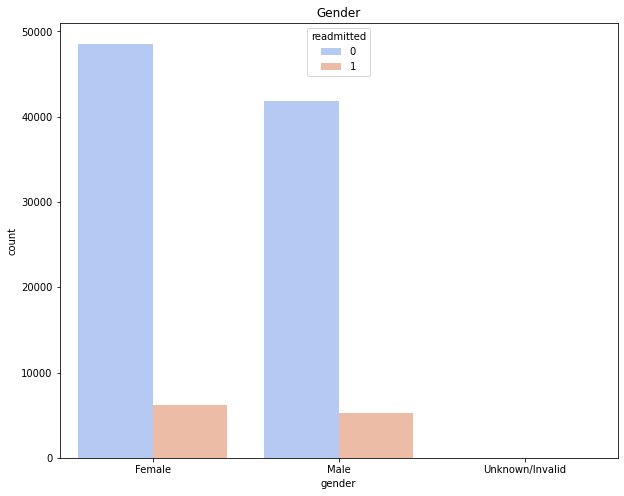

In [103]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.gender, data = df, hue='readmitted', palette = 'coolwarm')
plt.title("Gender")
plt.show()

In [55]:
print("Gender")
print(df.gender.value_counts(normalize = True)*100)

Gender
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: gender, dtype: float64


This bar graph shows the difference of gender being readmitted or not. It can be concluded that there are more diabetic females than diabetic males to be readmitted. Also more women than males to not be readmitted.

## Race

In [40]:
print("Race")
print(df.race.value_counts(normalize = True)*100)
#print out the data of Races
# There are very few number of unknown, Hispanic, Other, and Asian so it is better to combine them

Race
Caucasian          74.778413
AfricanAmerican    18.876639
unknown             2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64


In [48]:
combine = {"Asian":"Other","Hispanic":"Other", "?":"Other", "unknown":"Other"}
df.race = df.race.replace(combine)

print("Race After Combining")
print(df.race.value_counts(normalize= True)*100)
# prints the values of each column after combining

Race After Combining
Caucasian          74.778413
AfricanAmerican    18.876639
Other               6.344948
Name: race, dtype: float64


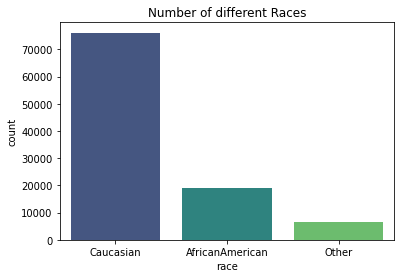

In [100]:
sns.countplot(x="race", data = df, palette = "viridis")
plt.title("Number of different Races")
plt.show()

Now lets see how race affects the chances of being readmitted

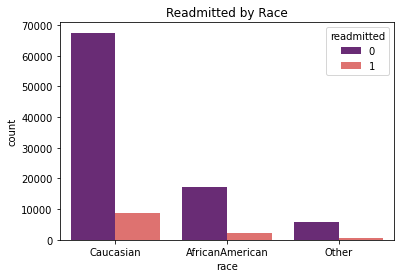

In [99]:
sns.countplot(x="race", hue= "readmitted", data = df, palette = 'magma')
plt.title("Readmitted by Race")
plt.show()

We can see that there is a greater chance of a Caucasian to be readmitted rather an African American to be readmitted to the hospital because of diabetes.

## Age

In [58]:
print("Age")
print(df.age.value_counts(normalize = True)*100)
# Prints out the ranges for Age

Age
[70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: age, dtype: float64


The highest rate is from ages 70-80 for diabetes

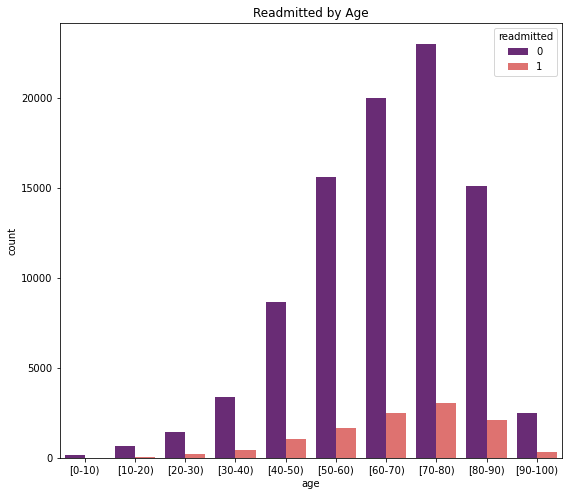

In [101]:
plt.figure(figsize=(9,8))
sns.countplot(x=df.age, data = df, hue='readmitted', palette = 'magma')
plt.title("Readmitted by Age")
plt.show()

This bargraph helps show the relation of age vs being readmitted to the hospital. It is very noticable that those of ages 70-80 are more likely to be readmitted than other ages.

# Build Models

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [64]:
# since I am focusing on just Age, Gender, Race, and readmitted we will limit the X to those columns
X = df.iloc[0:, 2:5]

In [65]:
X

,race,gender,age
0,Caucasian,Female,[0-10)
1,Caucasian,Female,[10-20)
2,AfricanAmerican,Female,[20-30)
3,Caucasian,Male,[30-40)
4,Caucasian,Male,[40-50)
...,...,...,...
101761,AfricanAmerican,Male,[70-80)
101762,AfricanAmerican,Female,[80-90)
101763,Caucasian,Male,[70-80)
101764,Caucasian,Female,[80-90)


Replace all categorical to numerical values to help make more accurate predictions

In [68]:
X = X.replace({"[0-10)":5,
               "[10-20)":15,
               "[20-30)":25,
               "[30-40)":35,
               "[40-50)":45,
               "[50-60)":55,
               "[60-70)":65,
               "[70-80)":75,
               "[80-90)":85,
               "[90-100)":95})
# Age

In [69]:
X = X.replace({"Female":1,
               "Male":2,
               "Unknown/Invalid":3})
# Gender

In [70]:
X = X.replace({"Caucasian":1,
               "AfricanAmerican":2,
               "Other":3})
# Race

In [71]:
y = df['readmitted']
# Set the dependent variable Readmitted to be y

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Logistic Regression Evaluation

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logmodel = LogisticRegression(random_state = 0)     # set logmel to logistic regression model
logmodel.fit(X_train, y_train)                      # train model based on .fit model

LogisticRegression(random_state=0)

In [78]:
y_pred = logmodel.predict(X_test)
predictions = logmodel.predict(X_test)

In [80]:
print('The Prediction Acuracy of the model is ', logmodel.score(X_test, y_test))
pp = logmodel.predict(X_test)
print("Readmitted to Hospital", sum(pp!=0))
print("Did not Readmit to the Hospital", sum(pp == 0))

The Prediction Acuracy of the model is  0.890271863740583
Readmitted to Hospital 0
Did not Readmit to the Hospital 30530


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27180
           1       0.00      0.00      0.00      3350

    accuracy                           0.89     30530
   macro avg       0.45      0.50      0.47     30530
weighted avg       0.79      0.89      0.84     30530



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
print((confusion_matrix(y_test,predictions)))

[[27180     0]
 [ 3350     0]]


The accuracy of the logistic regression is 89% which is quite high.

## KNN Model Evaluation

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier(n_neighbors=2)
# Test with 2 neighbors

In [86]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [87]:
knn2 = knn.predict(X_test)

In [89]:
print(confusion_matrix(y_test, knn2))
# print out the prediction matrix

[[26609   571]
 [ 3283    67]]


In [90]:
print(classification_report(y_test,knn2))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     27180
           1       0.11      0.02      0.03      3350

    accuracy                           0.87     30530
   macro avg       0.50      0.50      0.48     30530
weighted avg       0.80      0.87      0.83     30530



The accuracy of 2 neighbors is 87%

In [91]:
error_rate = []


for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

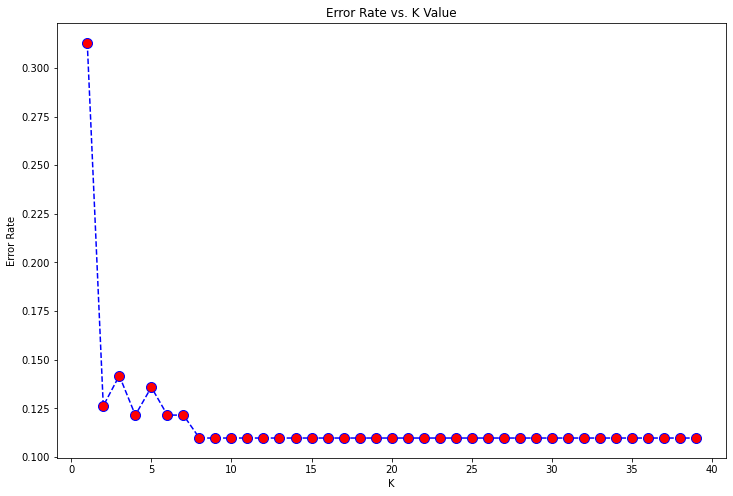

In [92]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title ('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Lets try to get a higher accuracy and test out 3 neighbors.

In [93]:
knn3 = KNeighborsClassifier(n_neighbors=3)

In [94]:
knn3.fit(X_train, y_train)
pred3 = knn3.predict(X_test)

In [95]:
print(confusion_matrix(y_test, pred3))

[[26064  1116]
 [ 3213   137]]


In [97]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     27180
           1       0.11      0.04      0.06      3350

    accuracy                           0.86     30530
   macro avg       0.50      0.50      0.49     30530
weighted avg       0.80      0.86      0.83     30530



The accuracy went down to 86% with 3 neighbors. This means the first time was more accurate with 2 than with 3 neighbors.

# Evaluate Models

After comparing the two knn models with 2 neighbors and 3 neighbors it can be seen that the 2 nighbors model had a little more accuracy and will show more accurate results when computing for error rate. With the logistic regression model, the accuracy was 89% which is more accurate than the knn model. 

The graphs help show the relationship between age, race, gender with readmitted values. It was concluded that ages 70-80 were more likely to be readmitted to the hospital. Caucasians are more likely to be readmitted than other races. Additionally females are more likely to be readmitted to the hospital.